<a href="https://colab.research.google.com/github/YuLim2/DataThon_BSSM/blob/master/sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

path = '/content/drive/MyDrive/dataset/'

train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')
sample_submission = pd.read_csv(path + 'submit_sample.csv')
train.head()

age gender  height_cm  ...  sit-ups counts  broad jump_cm  body fat_%
0  23.0      M      173.7  ...            57.0          233.0        12.7
1  24.0      M      181.6  ...            38.0          254.0         3.5
2  36.0      F      166.5  ...            40.0          186.0        25.9
3  22.0      F      165.8  ...            30.0          183.0        33.0
4  61.0      F      144.7  ...             7.0          126.0        28.3

[5 rows x 10 columns]

In [2]:
print(train.shape)
print(test.shape)

(9375, 10)
(4018, 9)


In [3]:
train['broad jump_cm'].value_counts()


220.0    128
230.0    126
211.0    124
180.0    110
200.0    108
        ... 
284.0      1
51.0       1
282.0      1
76.0       1
299.0      1
Name: broad jump_cm, Length: 235, dtype: int64

In [4]:
#train.drop(['id'], axis = 1, inplace = True)
#test.drop(['id'], axis = 1, inplace = True)

discrete_names = ["gender"]
continuous_names = ["age" , "height_cm", "diastolic", "systolic", "gripForce", "sit and bend forward_cm", "sit-ups counts", "broad jump_cm"]

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9375 entries, 0 to 9374
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      9375 non-null   float64
 1   gender                   9375 non-null   object 
 2   height_cm                9375 non-null   float64
 3   diastolic                9375 non-null   float64
 4   systolic                 9375 non-null   float64
 5   gripForce                9375 non-null   float64
 6   sit and bend forward_cm  9375 non-null   float64
 7   sit-ups counts           9375 non-null   float64
 8   broad jump_cm            9375 non-null   float64
 9   body fat_%               9375 non-null   float64
dtypes: float64(9), object(1)
memory usage: 732.5+ KB


In [6]:
train[train["body fat_%"].isnull()]

Empty DataFrame
Columns: [age, gender, height_cm, diastolic, systolic, gripForce, sit and bend forward_cm, sit-ups counts, broad jump_cm, body fat_%]
Index: []

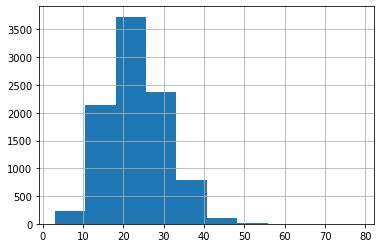

In [7]:
train["body fat_%"].hist()

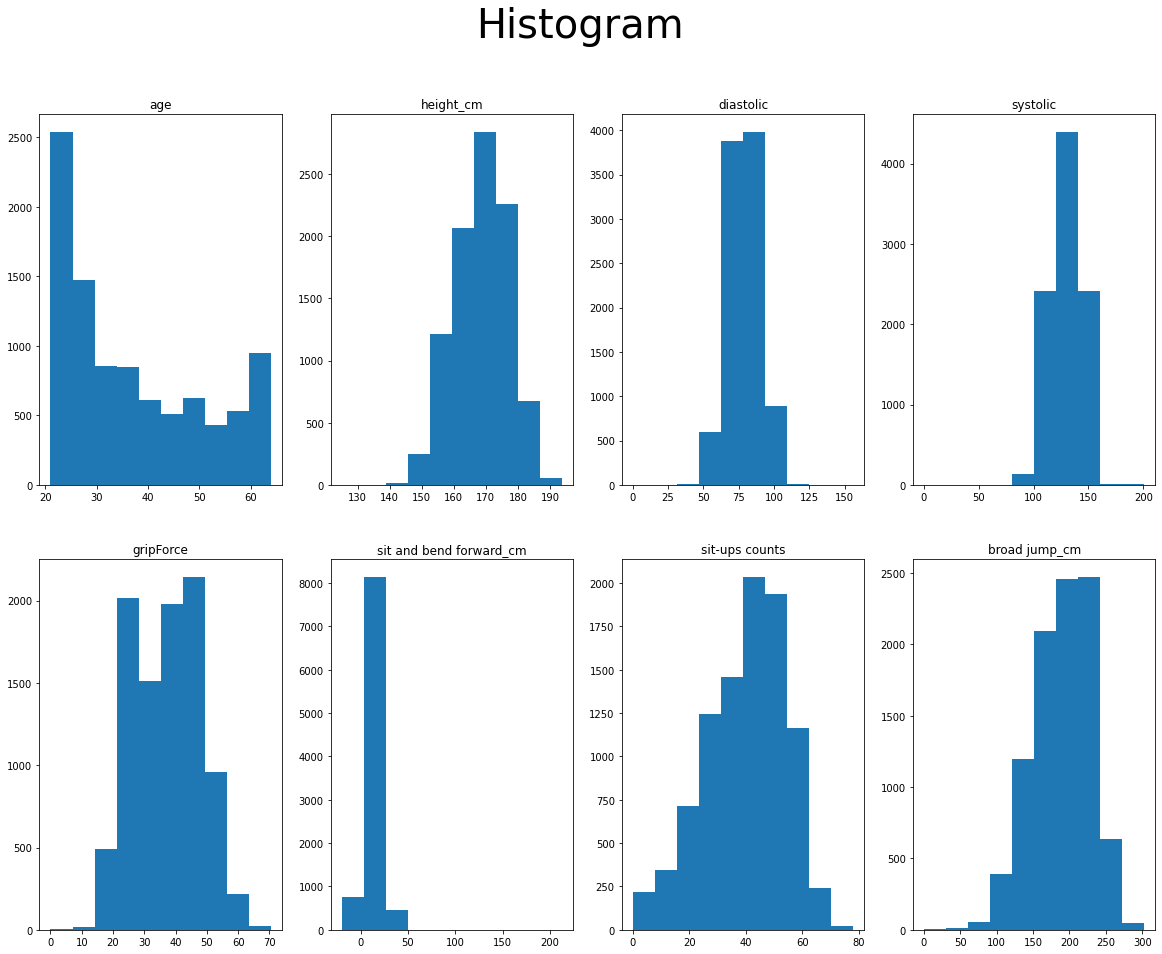

In [8]:
plt.figure(figsize=(20,15))
plt.suptitle("Histogram", fontsize=40)

for i in range(len(continuous_names)):
    plt.subplot(2,4,i+1)
    plt.title(continuous_names[i])
    plt.hist(train[continuous_names[i]])

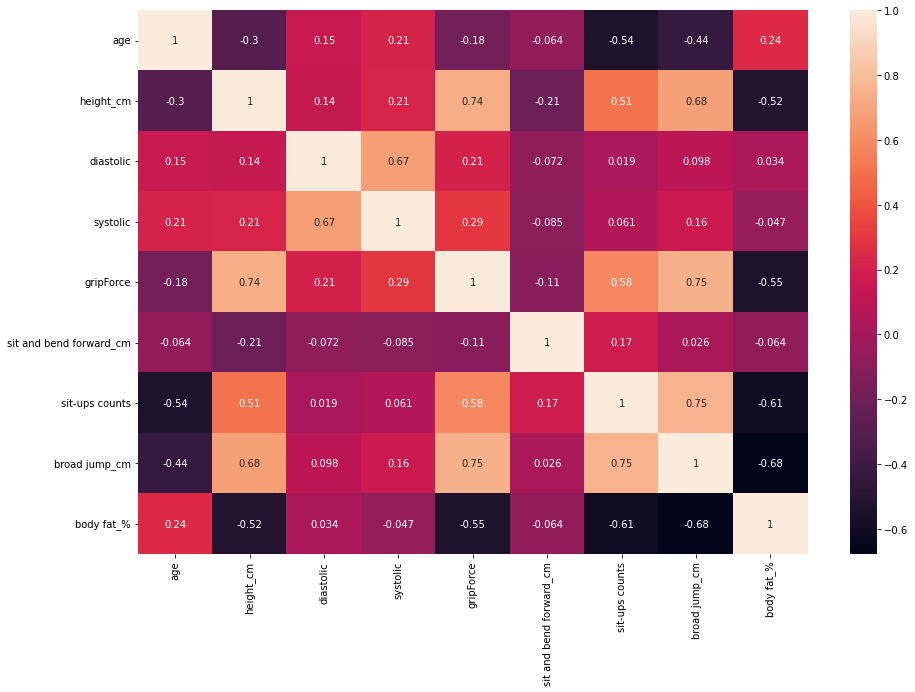

In [9]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(train.drop(discrete_names, axis = 1).corr(), annot=True)
plt.show()

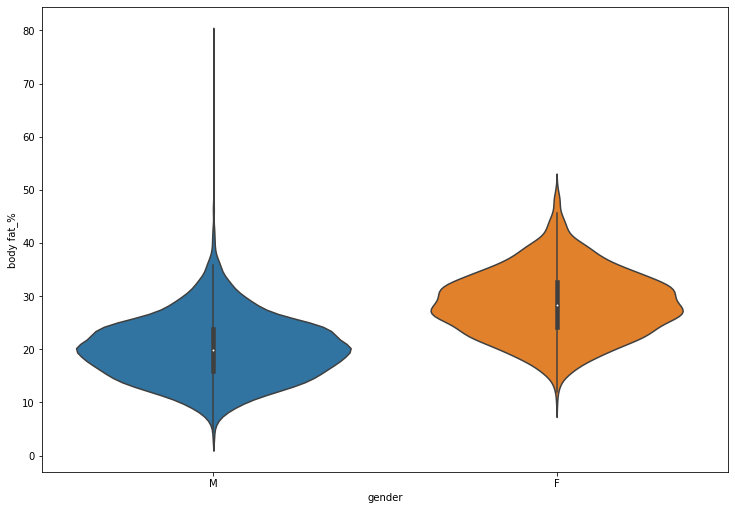

In [10]:
plt.figure(figsize=(20,15))

for i in range(len(discrete_names)):
    plt.subplot(2,2,i+1)
    plt.xlabel(discrete_names[i])
    plt.ylabel('Body Mass (g)')
    sns.violinplot(x= train[discrete_names[i]], y= train['body fat_%'])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [11]:
train.fillna(train.mean(), inplace = True)
test.fillna(train.mean(), inplace = True)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

print(train.shape)
print(test.shape)

(9375, 11)
(4018, 10)


In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train_scaler = scaler.fit_transform(train[continuous_names])
train[continuous_names] = pd.DataFrame(data=train_scaler, columns=continuous_names)

test_scaler = scaler.transform(test[continuous_names])
test[continuous_names] = pd.DataFrame(data=test_scaler, columns=continuous_names)

train[continuous_names].head()

age  height_cm  ...  sit-ups counts  broad jump_cm
0  0.046512   0.707849  ...        0.730769       0.768977
1  0.069767   0.822674  ...        0.487179       0.838284
2  0.348837   0.603198  ...        0.512821       0.613861
3  0.023256   0.593023  ...        0.384615       0.603960
4  0.930233   0.286337  ...        0.089744       0.415842

[5 rows x 8 columns]

In [13]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(max_samples=1000, random_state=1)
clf.fit(train)
y_pred_outliers = clf.predict(train)


In [14]:
train.drop(train[y_pred_outliers==-1].index, inplace=True)

In [15]:
train_label = train['body fat_%']
train.drop(["body fat_%"], axis = 1, inplace = True)

In [28]:
from sklearn.linear_model import Ridge
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

alphas = [i for i in range(1, 21)]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    
    neg_mse_scores = cross_val_score(ridge, train, train_label, scoring = 'neg_mean_squared_error', cv = 5)
    avg_rmse = np.mean(np.sqrt(-neg_mse_scores))
    print('alpha 값 ', alpha, '일때 평균 rmse :', np.round(avg_rmse,4))

alpha 값  1 일때 평균 rmse : 4.7627
alpha 값  2 일때 평균 rmse : 4.7643
alpha 값  3 일때 평균 rmse : 4.7664
alpha 값  4 일때 평균 rmse : 4.7689
alpha 값  5 일때 평균 rmse : 4.7717
alpha 값  6 일때 평균 rmse : 4.7747
alpha 값  7 일때 평균 rmse : 4.7778
alpha 값  8 일때 평균 rmse : 4.7809
alpha 값  9 일때 평균 rmse : 4.7842
alpha 값  10 일때 평균 rmse : 4.7875
alpha 값  11 일때 평균 rmse : 4.7909
alpha 값  12 일때 평균 rmse : 4.7942
alpha 값  13 일때 평균 rmse : 4.7976
alpha 값  14 일때 평균 rmse : 4.801
alpha 값  15 일때 평균 rmse : 4.8044
alpha 값  16 일때 평균 rmse : 4.8078
alpha 값  17 일때 평균 rmse : 4.8112
alpha 값  18 일때 평균 rmse : 4.8145
alpha 값  19 일때 평균 rmse : 4.8179
alpha 값  20 일때 평균 rmse : 4.8212


In [ ]:
from sklearn.linear_model import Ridge
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

alphas = [i for i in range(1, 121)]

for alpha in alphas:
    ridge = svm.SVR(C=alpha)
    
    neg_mse_scores = cross_val_score(ridge, train, train_label, scoring = 'neg_mean_absolute_error', cv = 5)
    avg_rmse = np.mean(np.sqrt(-neg_mse_scores))
    print('alpha 값 ', alpha, '일때 평균 rmse :', np.round(avg_rmse,4))

alpha 값  1 일때 평균 rmse : 1.932
alpha 값  2 일때 평균 rmse : 1.9286
alpha 값  3 일때 평균 rmse : 1.9277
alpha 값  4 일때 평균 rmse : 1.9272
alpha 값  5 일때 평균 rmse : 1.9269
alpha 값  6 일때 평균 rmse : 1.9267
alpha 값  7 일때 평균 rmse : 1.9266
alpha 값  8 일때 평균 rmse : 1.9265
alpha 값  9 일때 평균 rmse : 1.9265
alpha 값  10 일때 평균 rmse : 1.9266
alpha 값  11 일때 평균 rmse : 1.9266
alpha 값  12 일때 평균 rmse : 1.9265
alpha 값  13 일때 평균 rmse : 1.9265
alpha 값  14 일때 평균 rmse : 1.9265
alpha 값  15 일때 평균 rmse : 1.9265


In [34]:
ridge = svm.SVR(C=16)
ridge.fit(train, train_label)
sample_submission["predict"] = ridge.predict(test)

sample_submission.to_csv('my_submit.csv',index=False)